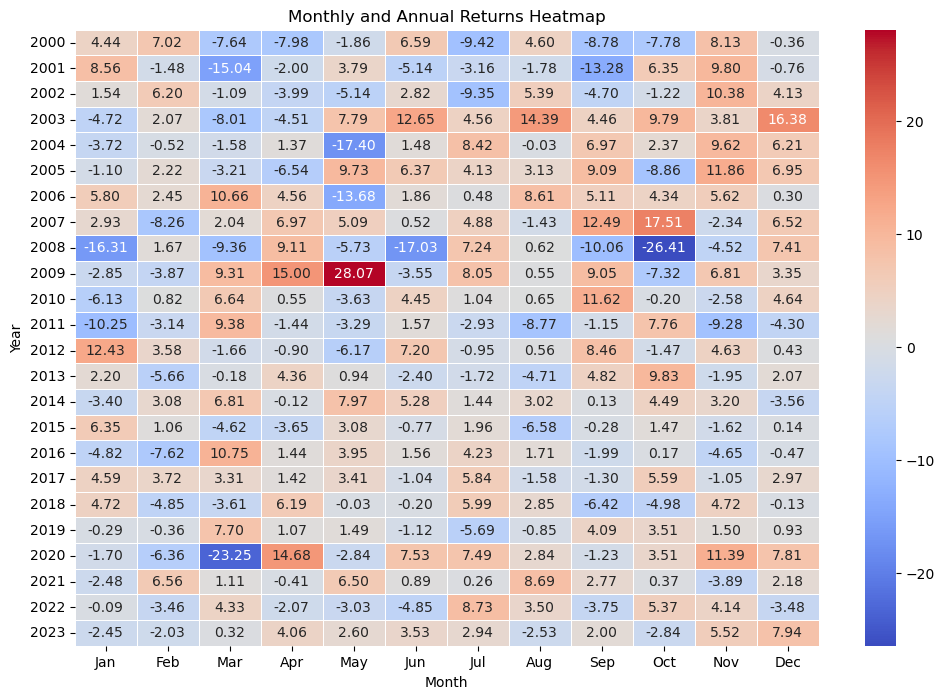

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
nifty_data = pd.read_csv('niftydata20yrs.csv')  
heatmap_data = nifty_data[['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
heatmap_data.set_index('Year', inplace=True)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Monthly and Annual Returns Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


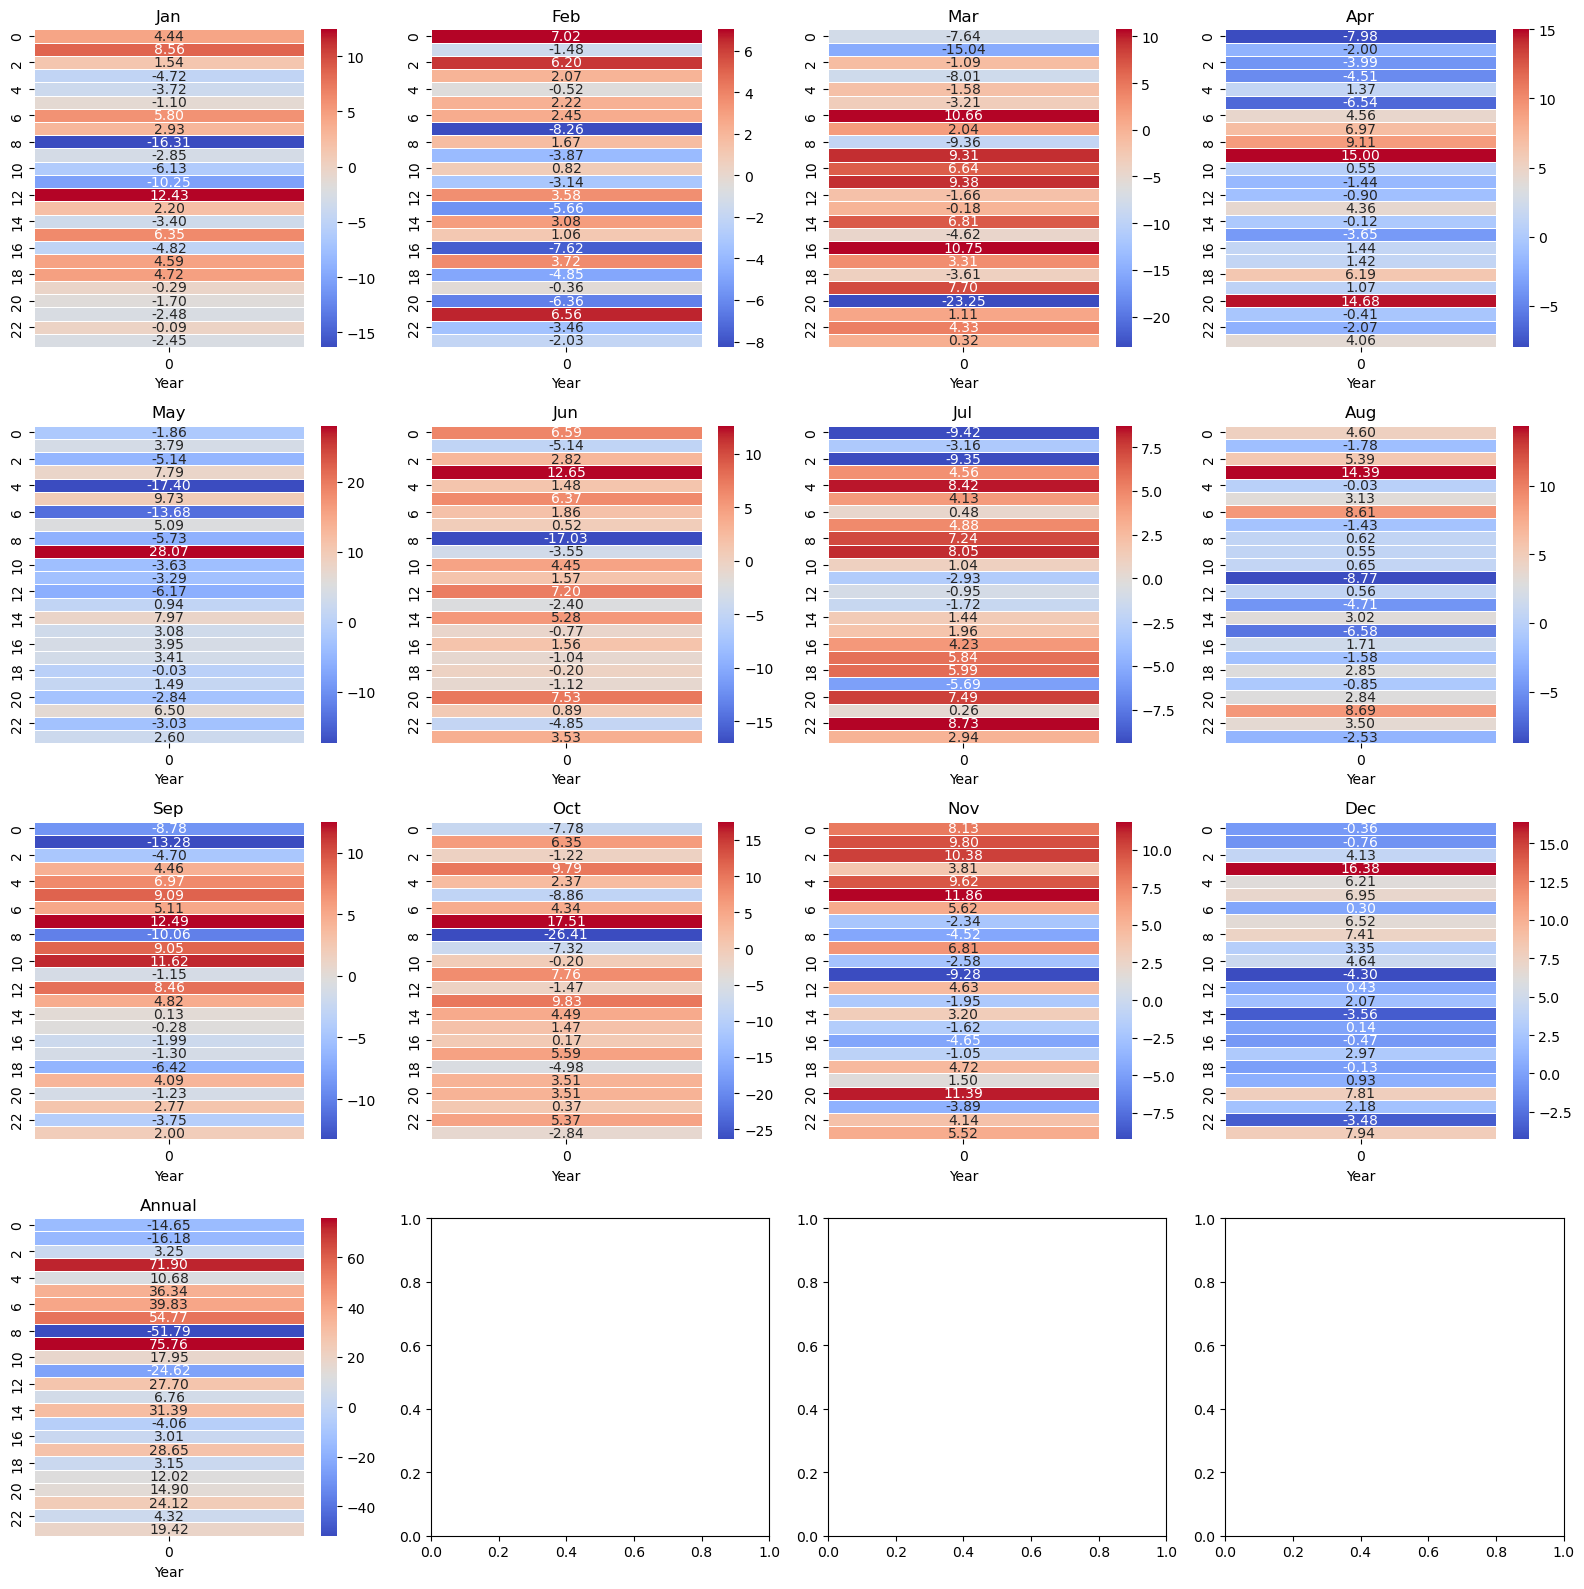

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


nifty_data = pd.read_csv('niftydata20yrs.csv')  


nifty_data.set_index('Year', inplace=True)

fig, axes = plt.subplots(4, 4, figsize=(16, 16))


for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual']):
    row = i // 4
    col = i % 4
    
    
    if month == 'Annual':
        data = nifty_data['Annual']
    else:
        data = nifty_data[month]
    

    sns.heatmap(data=data.values.reshape(-1, 1), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, ax=axes[row, col])
    axes[row, col].set_title(month)
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('')


plt.tight_layout()
plt.show()


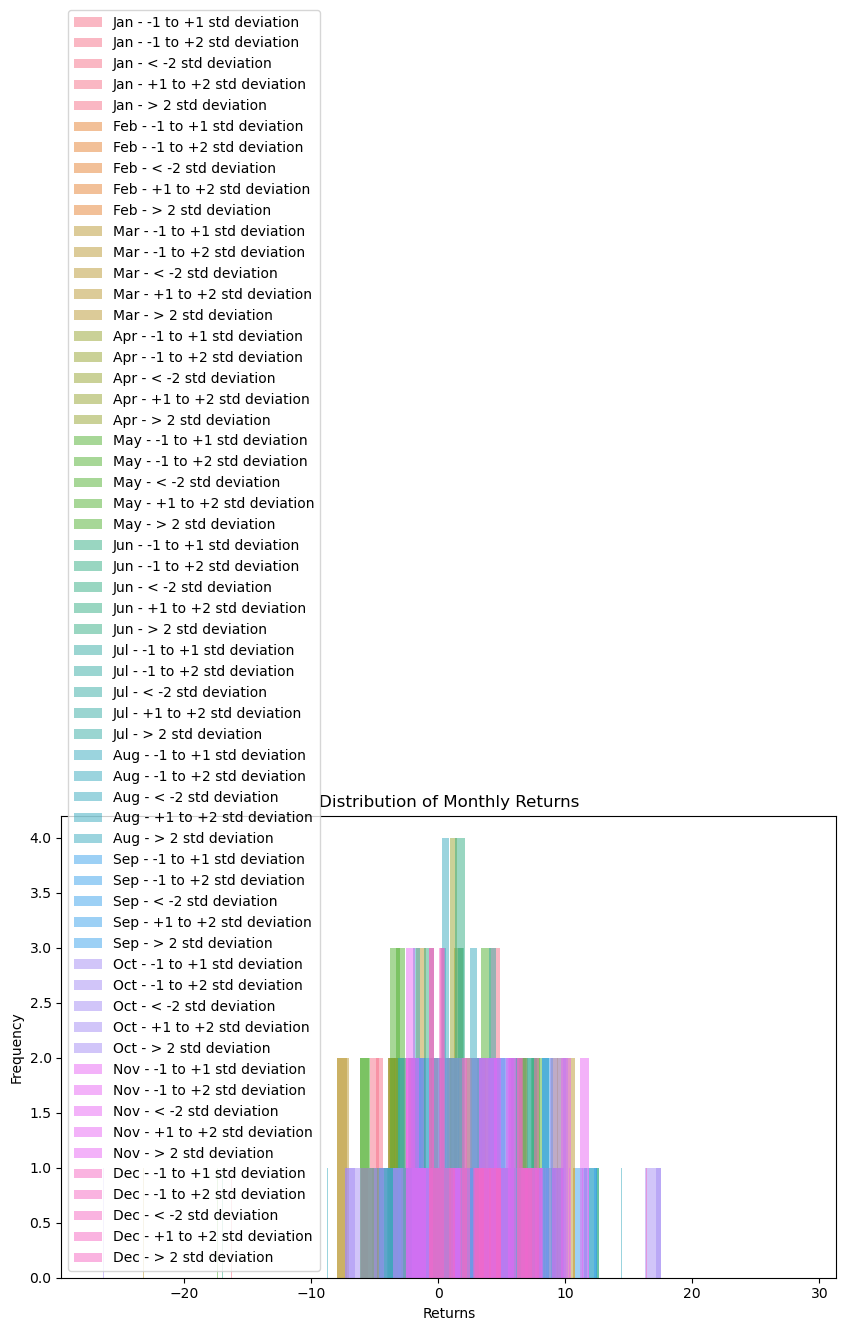

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
nifty_data = pd.read_csv('niftydata20yrs.csv')  
monthly_mean = nifty_data.mean(axis=0)
monthly_std = nifty_data.std(axis=0)
buckets = [
    {'label': '-1 to +1 std deviation', 'range': (-1, 1)},
    {'label': '-1 to +2 std deviation', 'range': (-1, 2)},
    {'label': '< -2 std deviation', 'range': (-np.inf, -2)},
    {'label': '+1 to +2 std deviation', 'range': (1, 2)},
    {'label': '> 2 std deviation', 'range': (2, np.inf)}
]
colors = sns.color_palette("husl", 12)
plt.figure(figsize=(10, 6))
for month, color in zip(nifty_data.columns[1:], colors):
    monthly_returns = nifty_data[month]
    for bucket in buckets:
        lower, upper = bucket['range']
        filtered_returns = monthly_returns[(monthly_returns >= lower * monthly_std[month] + monthly_mean[month]) & 
                                            (monthly_returns <= upper * monthly_std[month] + monthly_mean[month])]
        plt.hist(filtered_returns, bins=20, alpha=0.5, label=f'{month} - {bucket["label"]}', color=color)

plt.title('Distribution of Monthly Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()


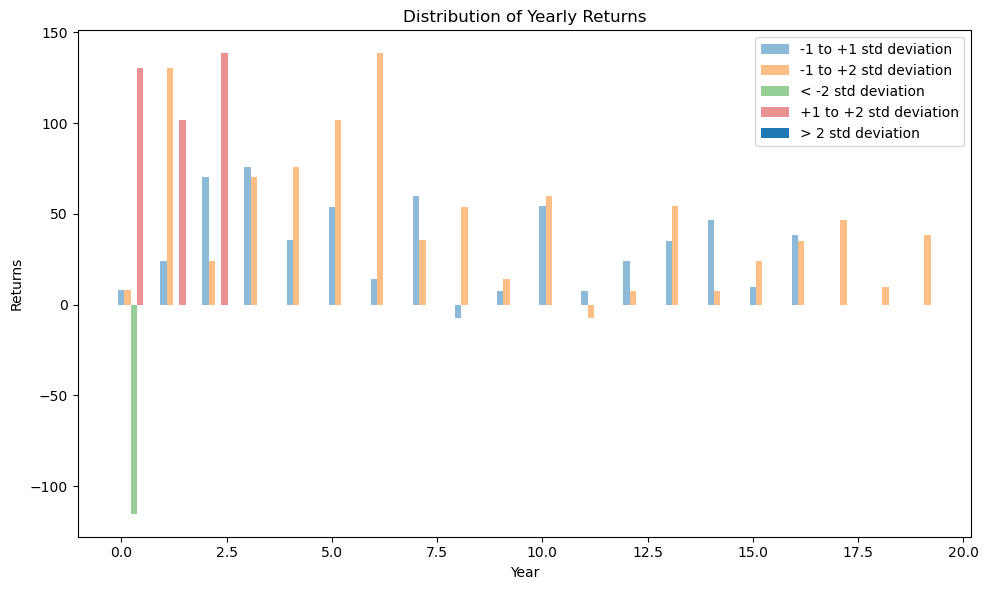

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
nifty_data = pd.read_csv('niftydata20yrs.csv')  # Replace 'your_dataset.csv' with the path to your dataset file

# Calculate the mean and standard deviation of yearly returns
yearly_returns = nifty_data.iloc[:, 1:].sum(axis=1)  # Assuming all monthly returns are stored in columns after the first
yearly_mean = yearly_returns.mean()
yearly_std = yearly_returns.std()

# Define the buckets
buckets = [
    {'label': '-1 to +1 std deviation', 'range': (-1, 1)},
    {'label': '-1 to +2 std deviation', 'range': (-1, 2)},
    {'label': '< -2 std deviation', 'range': (-np.inf, -2)},
    {'label': '+1 to +2 std deviation', 'range': (1, 2)},
    {'label': '> 2 std deviation', 'range': (2, np.inf)}
]

# Create the histogram
plt.figure(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.15

for i, bucket in enumerate(buckets):
    lower, upper = bucket['range']
    filtered_returns = yearly_returns[(yearly_returns >= lower * yearly_std + yearly_mean) &
                                      (yearly_returns <= upper * yearly_std + yearly_mean)]
    
    # Calculate the x positions for bars, adding an offset for each bucket
    x_positions = np.arange(len(filtered_returns)) + i * bar_width
    
    # Plot the bars with the calculated x positions
    plt.bar(x_positions, filtered_returns.values, width=bar_width, alpha=0.5, label=bucket['label'])

plt.title('Distribution of Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend()
plt.tight_layout()
plt.show()


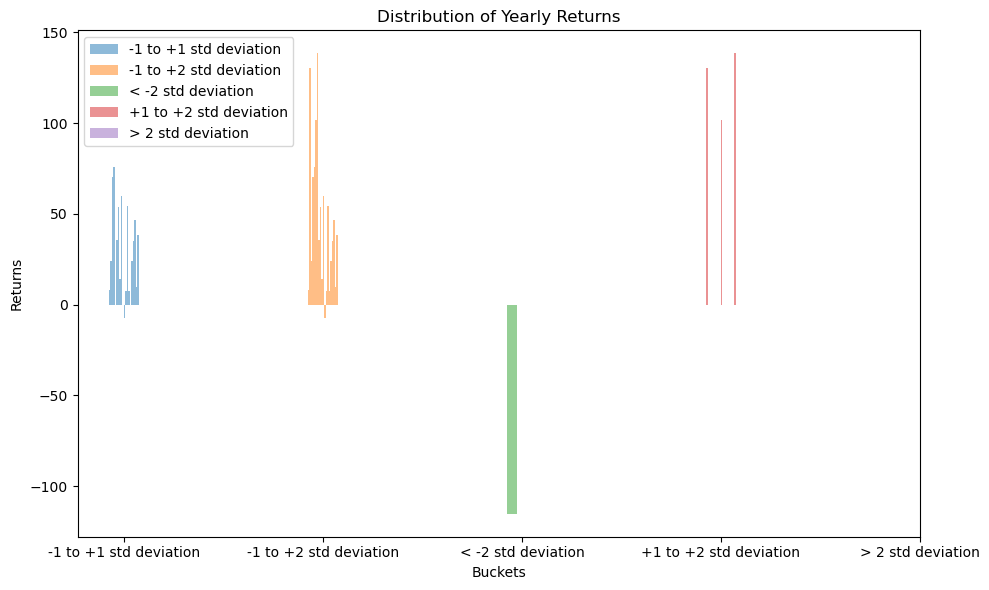

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
nifty_data = pd.read_csv('niftydata20yrs.csv')  # Replace 'your_dataset.csv' with the path to your dataset file

# Calculate the mean and standard deviation of yearly returns
yearly_returns = nifty_data.iloc[:, 1:].sum(axis=1)  # Assuming all monthly returns are stored in columns after the first
yearly_mean = yearly_returns.mean()
yearly_std = yearly_returns.std()

# Define the buckets
buckets = [
    {'label': '-1 to +1 std deviation', 'range': (-1, 1)},
    {'label': '-1 to +2 std deviation', 'range': (-1, 2)},
    {'label': '< -2 std deviation', 'range': (-np.inf, -2)},
    {'label': '+1 to +2 std deviation', 'range': (1, 2)},
    {'label': '> 2 std deviation', 'range': (2, np.inf)}
]

# Create the histogram
plt.figure(figsize=(10, 6))
bar_width = 0.15

# Calculate the x positions for bars
x_positions = np.arange(len(buckets))

for i, bucket in enumerate(buckets):
    lower, upper = bucket['range']
    filtered_returns = yearly_returns[(yearly_returns >= lower * yearly_std + yearly_mean) &
                                      (yearly_returns <= upper * yearly_std + yearly_mean)]
    
    # Calculate the x position for each histogram
    x_values = x_positions[i] + np.linspace(-bar_width/2, bar_width/2, len(filtered_returns))
    
    plt.hist(x_values, bins=20, weights=filtered_returns, alpha=0.5, label=bucket['label'])

plt.title('Distribution of Yearly Returns')
plt.xlabel('Buckets')
plt.ylabel('Returns')
plt.xticks(x_positions, [bucket['label'] for bucket in buckets])  # Label the x-axis with bucket labels
plt.legend()
plt.tight_layout()
plt.show()


In [1]:
# Plotting the histogram
plt.hist(data, bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# Displaying the histogram
plt.show()

NameError: name 'plt' is not defined

In [2]:
import matplotlib.pyplot as plt

# Assuming 'data' is your sample data
plt.hist(data, bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# Displaying the histogram
plt.show()


NameError: name 'data' is not defined

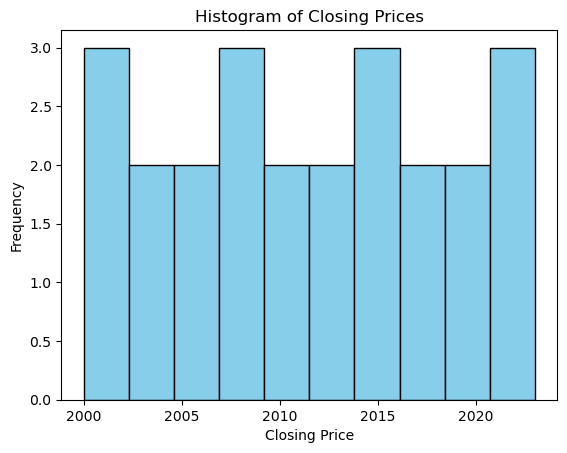

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Assuming you want to plot a histogram for the 'closing_price' column
plt.hist(nifty_data['Year'], bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices')

# Displaying the histogram
plt.show()


In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(monthly_returns.values.flatten(), bins=5, kde=True)
plt.title('Distribution of Monthly Returns')
plt.xlabel('Monthly Returns')
plt.ylabel('Frequency')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(monthly_returns.values.flatten(), bins=5, kde=True)
plt.title('Distribution of Monthly Returns')
plt.xlabel('Monthly Returns')
plt.ylabel('Frequency')
plt.show()


NameError: name 'monthly_returns' is not defined

<Figure size 1000x600 with 0 Axes>

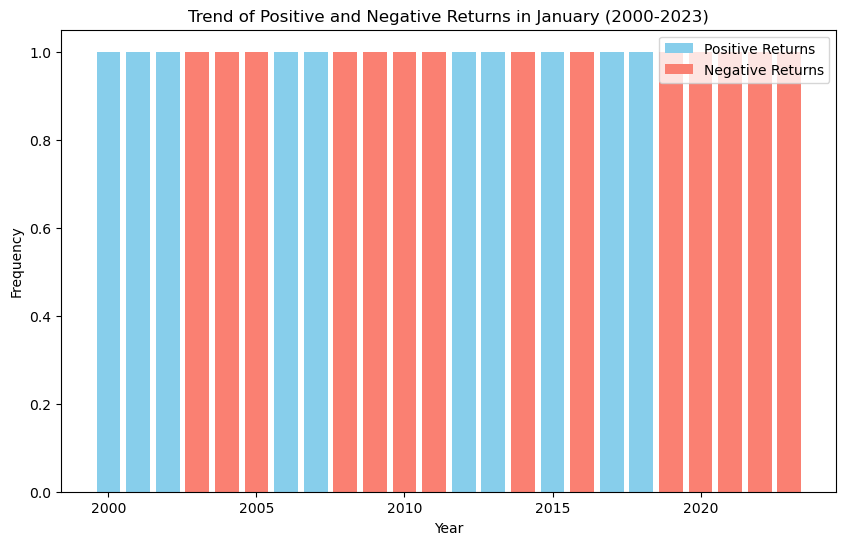

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Filter data to include only 'Year' and 'Jan' columns
jan_data = nifty_data[['Year', 'Jan']]

# Create lists to store positive and negative counts
positive_counts = []
negative_counts = []

# Iterate over 'Jan' column to categorize returns and count occurrences
for index, row in jan_data.iterrows():
    if row['Jan'] > 0:
        positive_counts.append(row['Year'])
    elif row['Jan'] < 0:
        negative_counts.append(row['Year'])

# Count occurrences of positive and negative returns for each year
positive_counts = pd.Series(positive_counts).value_counts().sort_index()
negative_counts = pd.Series(negative_counts).value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(positive_counts.index, positive_counts.values, color='skyblue', label='Positive Returns')
plt.bar(negative_counts.index, negative_counts.values, color='salmon', label='Negative Returns')
plt.title('Trend of Positive and Negative Returns in January (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()


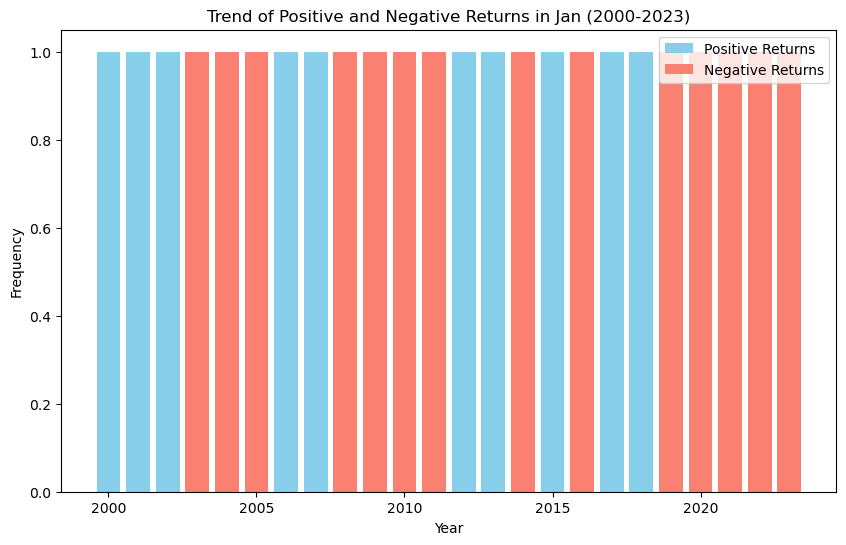

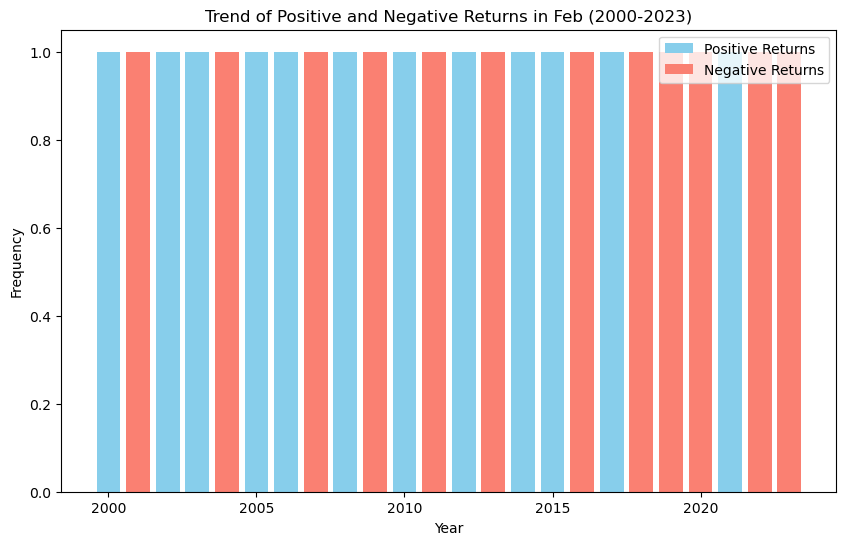

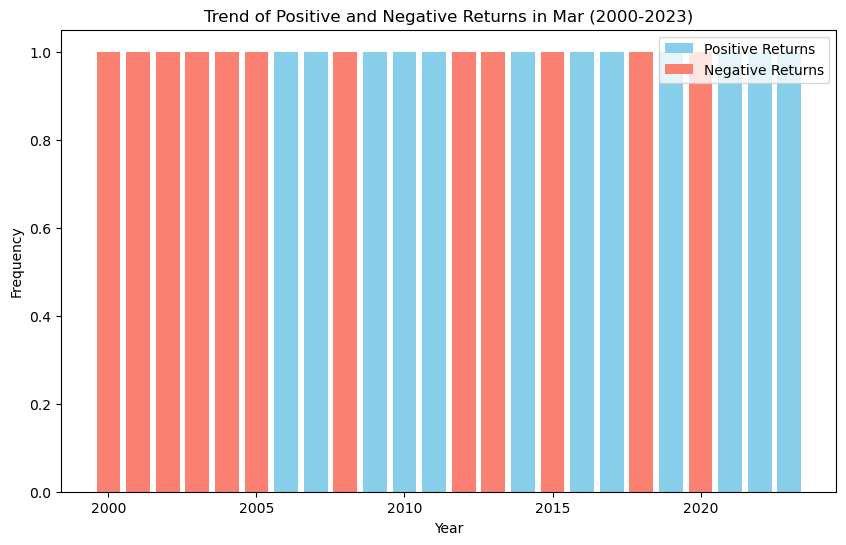

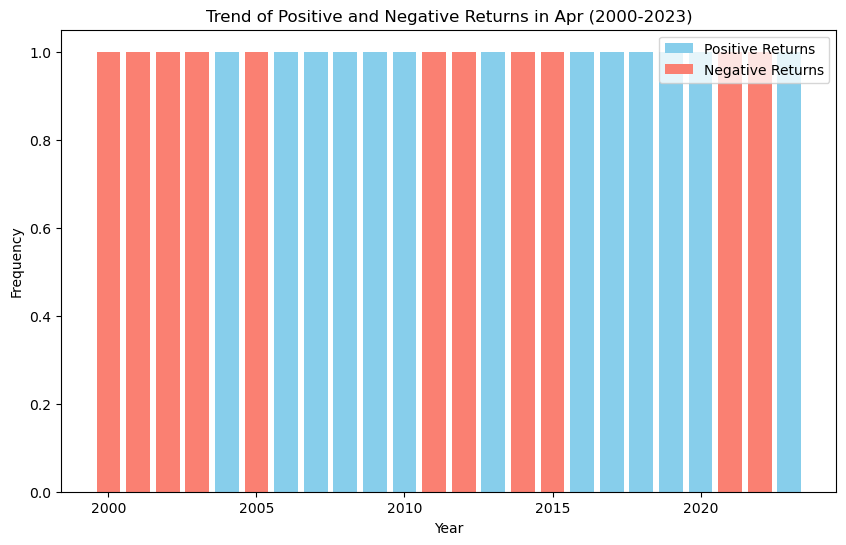

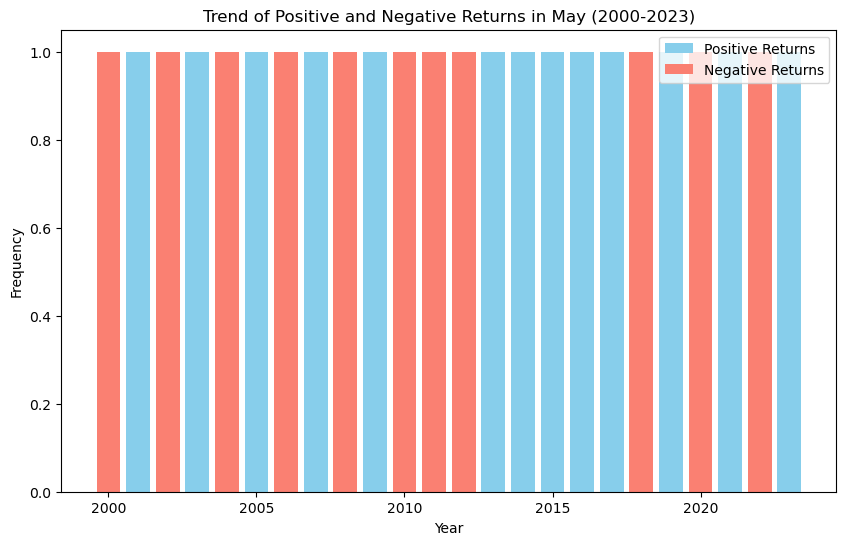

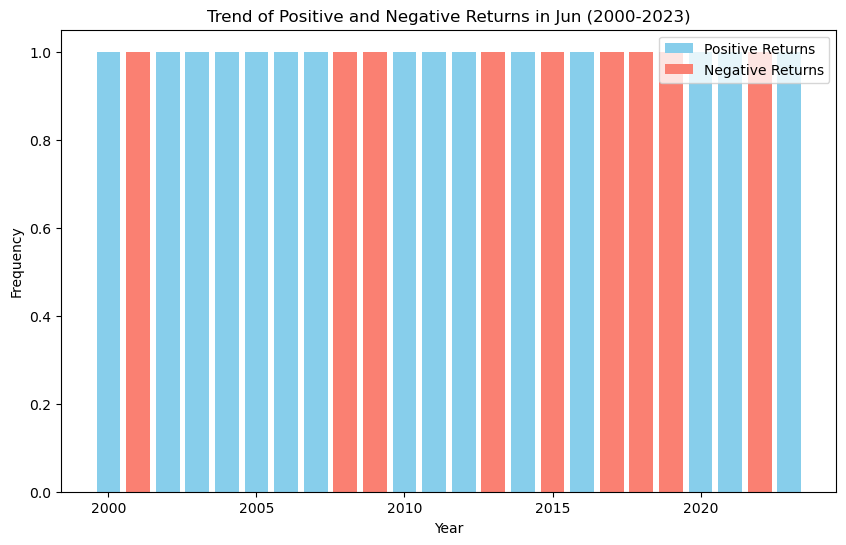

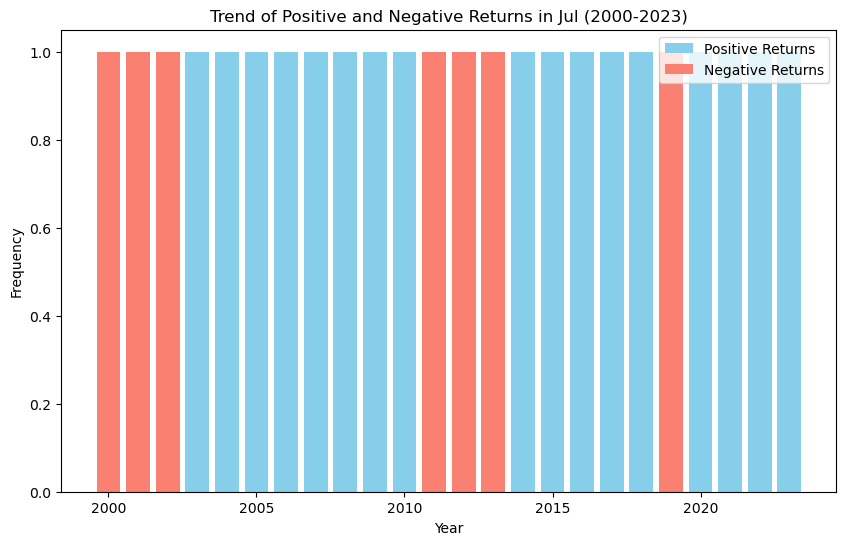

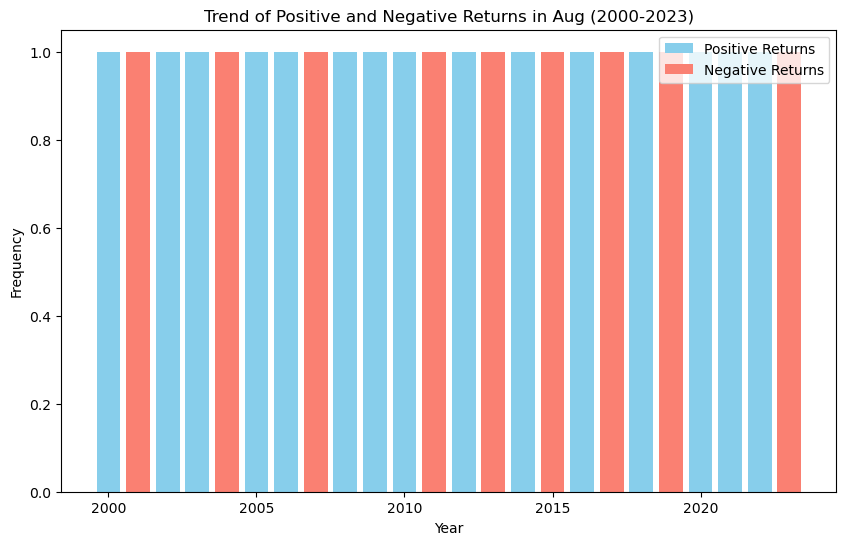

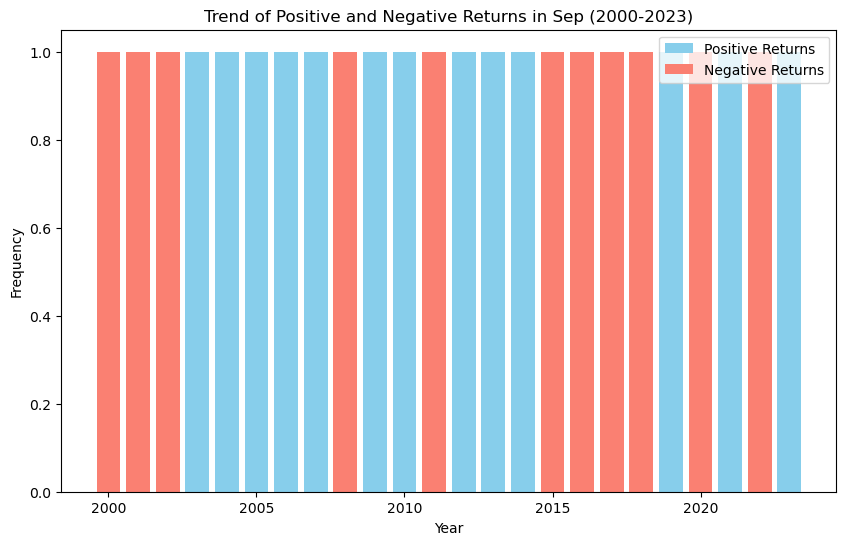

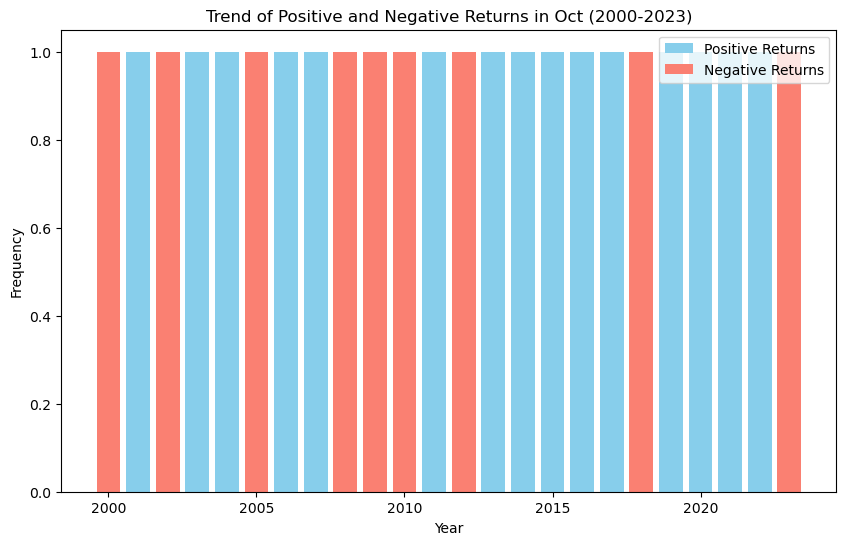

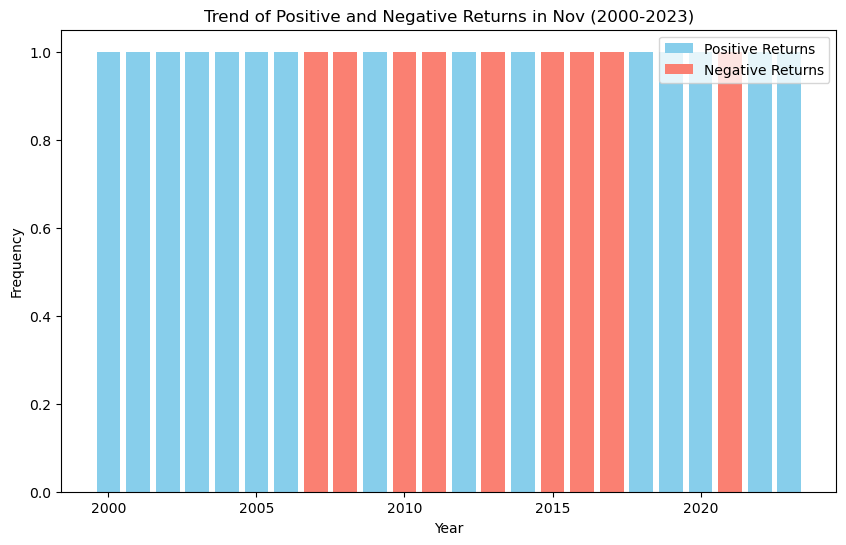

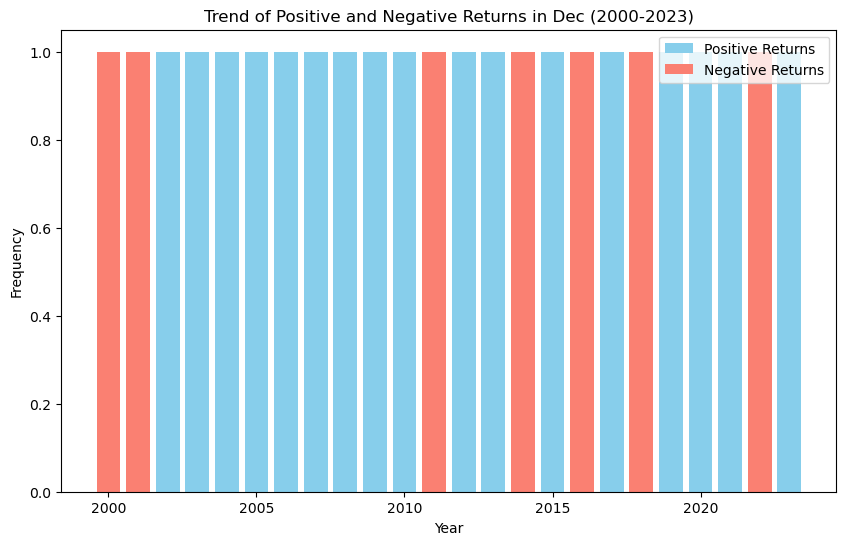

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Iterate over each month
for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
    # Filter data to include only 'Year' and the current month column
    month_data = nifty_data[['Year', month]]

    # Create lists to store positive and negative counts
    positive_counts = []
    negative_counts = []

    # Iterate over the current month column to categorize returns and count occurrences
    for index, row in month_data.iterrows():
        if row[month] > 0:
            positive_counts.append(row['Year'])
        elif row[month] < 0:
            negative_counts.append(row['Year'])

    # Count occurrences of positive and negative returns for each year
    positive_counts = pd.Series(positive_counts).value_counts().sort_index()
    negative_counts = pd.Series(negative_counts).value_counts().sort_index()

    # Plotting the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(positive_counts.index, positive_counts.values, color='skyblue', label='Positive Returns')
    plt.bar(negative_counts.index, negative_counts.values, color='salmon', label='Negative Returns')
    plt.title(f'Trend of Positive and Negative Returns in {month} (2000-2023)')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


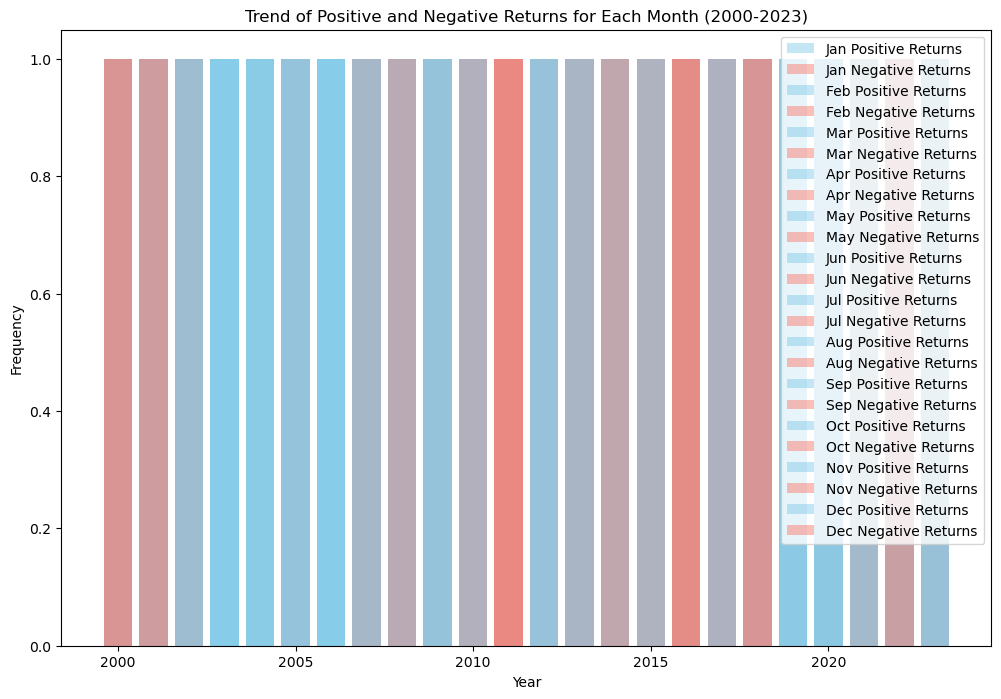

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Create an empty dictionary to store counts for each month
monthly_counts = {}

# Iterate over each month
for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
    # Filter data to include only 'Year' and the current month column
    month_data = nifty_data[['Year', month]]

    # Create lists to store positive and negative counts
    positive_counts = []
    negative_counts = []

    # Iterate over the current month column to categorize returns and count occurrences
    for index, row in month_data.iterrows():
        if row[month] > 0:
            positive_counts.append(row['Year'])
        elif row[month] < 0:
            negative_counts.append(row['Year'])

    # Count occurrences of positive and negative returns for each year
    positive_counts = pd.Series(positive_counts).value_counts().sort_index()
    negative_counts = pd.Series(negative_counts).value_counts().sort_index()

    # Store the counts in the dictionary
    monthly_counts[month] = {'positive': positive_counts, 'negative': negative_counts}

# Plotting the bar graph
plt.figure(figsize=(12, 8))
for month, counts in monthly_counts.items():
    plt.bar(counts['positive'].index, counts['positive'].values, color='skyblue', label=f'{month} Positive Returns', alpha=0.5)
    plt.bar(counts['negative'].index, counts['negative'].values, color='salmon', label=f'{month} Negative Returns', alpha=0.5)

plt.title('Trend of Positive and Negative Returns for Each Month (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()


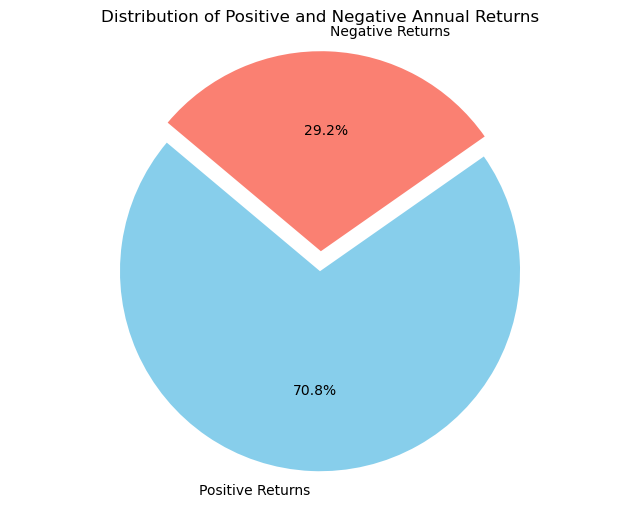

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Create lists to store positive and negative annual returns
positive_annual_returns = []
negative_annual_returns = []

# Iterate over each year
for index, row in nifty_data.iterrows():
    annual_return = row['Dec']  # Assuming 'Dec' represents the annual return
    if annual_return > 0:
        positive_annual_returns.append(annual_return)
    elif annual_return < 0:
        negative_annual_returns.append(annual_return)

# Calculate the total count of positive and negative annual returns
total_positive_returns = len(positive_annual_returns)
total_negative_returns = len(negative_annual_returns)

# Plotting the pie chart
labels = ['Positive Returns', 'Negative Returns']
sizes = [total_positive_returns, total_negative_returns]
colors = ['skyblue', 'salmon']
explode = (0, 0.1)  # Explode the slice for negative returns for better visibility

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positive and Negative Annual Returns')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


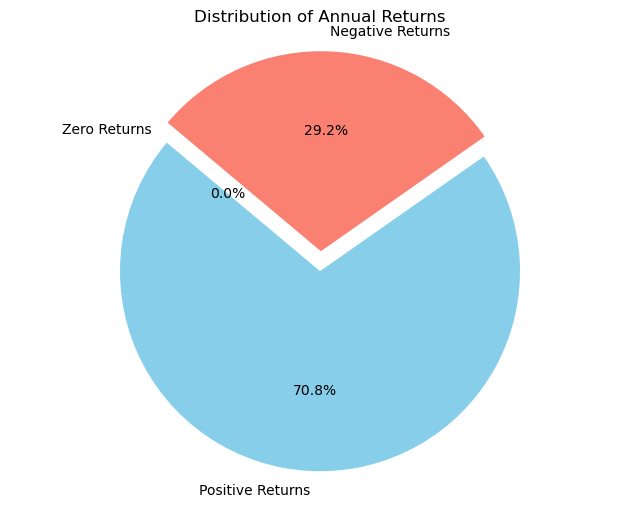

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Calculate the total count of annual returns
positive_annual_returns = nifty_data[nifty_data['Dec'] > 0]['Dec'].count()
negative_annual_returns = nifty_data[nifty_data['Dec'] < 0]['Dec'].count()
zero_annual_returns = nifty_data[nifty_data['Dec'] == 0]['Dec'].count()

# Plotting the pie chart
labels = ['Positive Returns', 'Negative Returns', 'Zero Returns']
sizes = [positive_annual_returns, negative_annual_returns, zero_annual_returns]
colors = ['skyblue', 'salmon', 'lightgreen']
explode = (0, 0.1, 0)  # Explode the slice for negative returns for better visibility

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Annual Returns')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


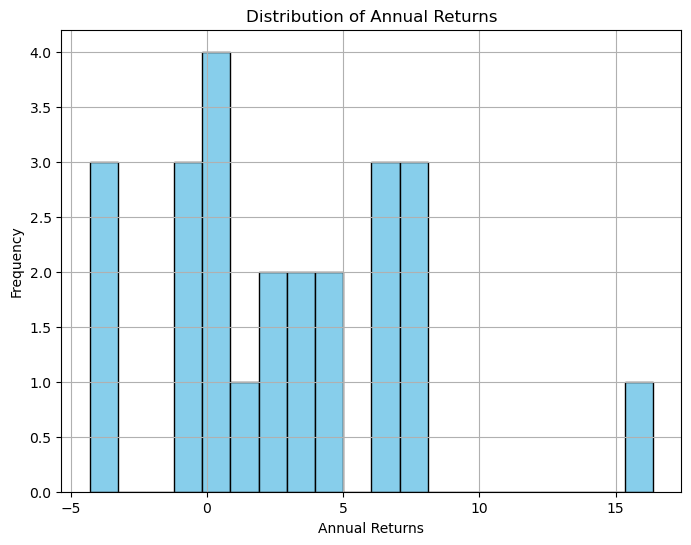

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Extract the annual returns from the 'Dec' column
annual_returns = nifty_data['Dec']

# Plotting the histogram to visualize the distribution of annual returns
plt.figure(figsize=(8, 6))
plt.hist(annual_returns, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Returns')
plt.xlabel('Annual Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [12]:
import pandas as pd

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Find the row with the maximum return value
max_return_row = nifty_data.iloc[nifty_data['Dec'].idxmax()]

# Extract the year and month with the highest return value
highest_year = max_return_row['Year']
highest_month = max_return_row.idxmax()

print(f"The year with the highest return value is {highest_year}, and the month is {highest_month}.")


The year with the highest return value is 2003.0, and the month is Year.


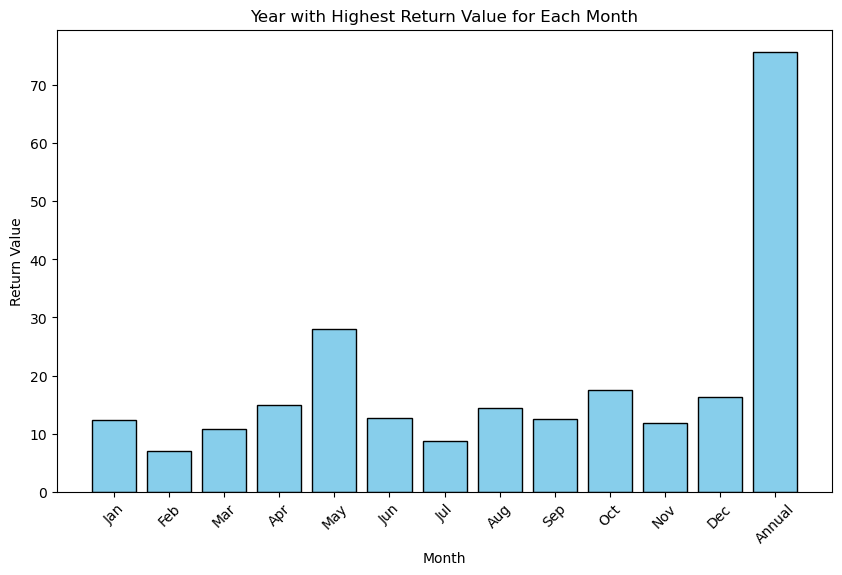

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Find the row with the maximum return value for each month
max_returns_by_month = nifty_data.drop(columns='Year').max()

# Extract the year with the highest return value for each month
highest_years_by_month = nifty_data.drop(columns='Year').idxmax()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(max_returns_by_month.index, max_returns_by_month, color='skyblue', edgecolor='black')
plt.title('Year with Highest Return Value for Each Month')
plt.xlabel('Month')
plt.ylabel('Return Value')
plt.xticks(rotation=45)
plt.show()


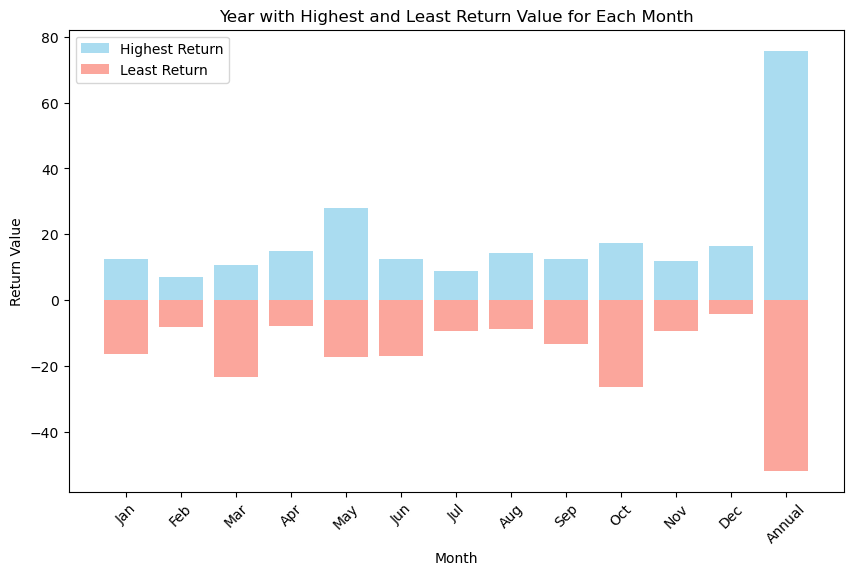

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Find the row with the maximum and minimum return values for each month
max_returns_by_month = nifty_data.drop(columns='Year').max()
min_returns_by_month = nifty_data.drop(columns='Year').min()

# Extract the years with the highest and least return values for each month
highest_years_by_month = nifty_data.drop(columns='Year').idxmax()
least_years_by_month = nifty_data.drop(columns='Year').idxmin()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(max_returns_by_month.index, max_returns_by_month, color='skyblue', label='Highest Return', alpha=0.7)
plt.bar(min_returns_by_month.index, min_returns_by_month, color='salmon', label='Least Return', alpha=0.7)
plt.title('Year with Highest and Least Return Value for Each Month')
plt.xlabel('Month')
plt.ylabel('Return Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()


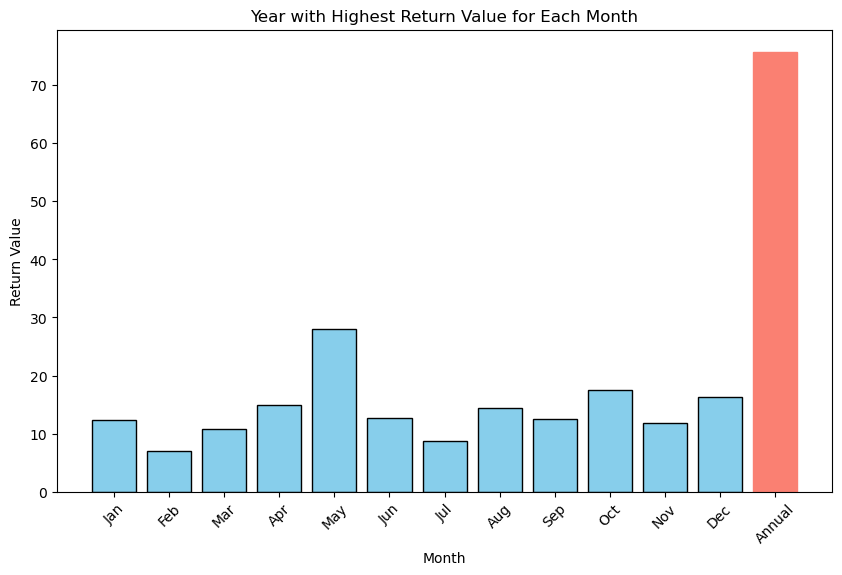

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Find the row with the maximum return value for each month
max_returns_by_month = nifty_data.drop(columns='Year').max()

# Extract the year with the highest return value for each month
highest_years_by_month = nifty_data.drop(columns='Year').idxmax()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(max_returns_by_month.index, max_returns_by_month, color='skyblue', edgecolor='black')

# Set the color of the bar with the highest return value to red
highest_month = max_returns_by_month.idxmax()
bars[max_returns_by_month.index.get_loc(highest_month)].set_color('salmon')

plt.title('Year with Highest Return Value for Each Month')
plt.xlabel('Month')
plt.ylabel('Return Value')
plt.xticks(rotation=45)
plt.show()



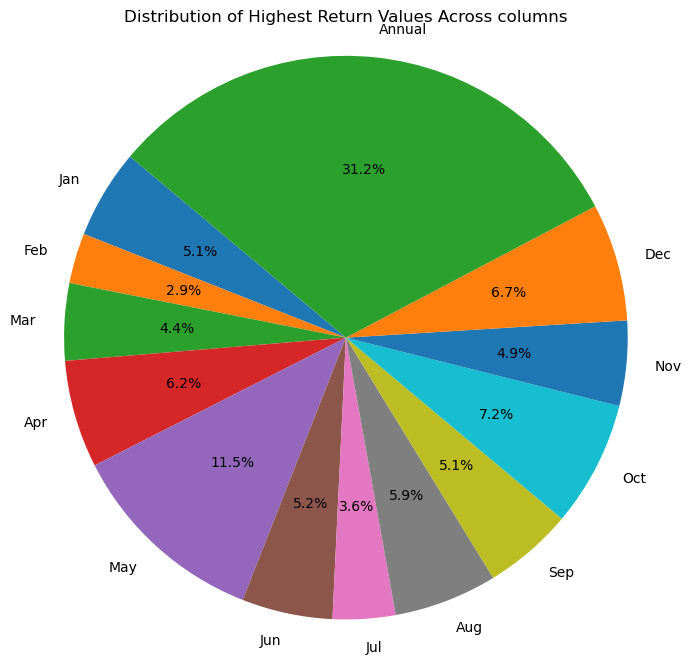

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Find the row with the maximum return value for each month
max_returns_by_month = nifty_data.drop(columns='Year').max()

# Extract the year with the highest return value for each month
highest_years_by_month = nifty_data.drop(columns='Year').idxmax()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(max_returns_by_month, labels=max_returns_by_month.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Highest Return Values Across columns')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


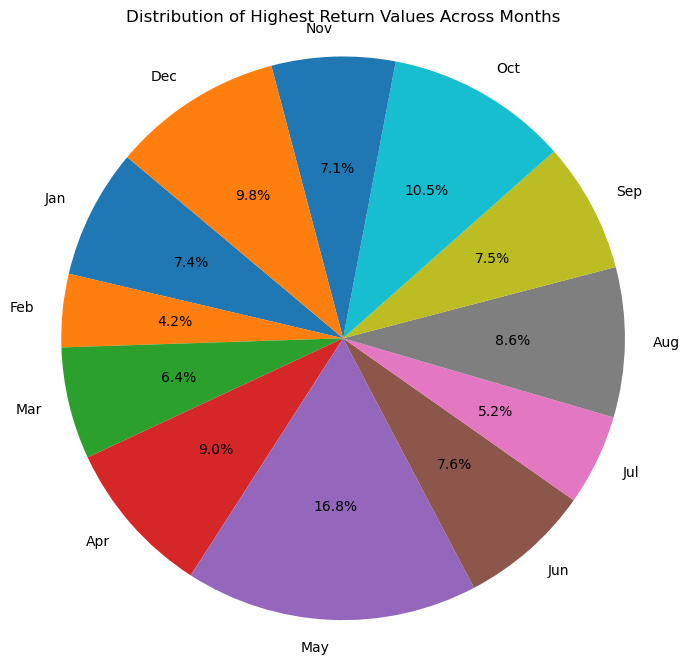

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
nifty_data = pd.read_csv('niftydata20yrs.csv')

# Remove the 'Annual' column
nifty_data.drop(columns='Annual', inplace=True)

# Find the row with the maximum return value for each month
max_returns_by_month = nifty_data.drop(columns='Year').max()

# Extract the year with the highest return value for each month
highest_years_by_month = nifty_data.drop(columns='Year').idxmax()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(max_returns_by_month, labels=max_returns_by_month.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Highest Return Values Across Months')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [1]:
import pandas as pd
import numpy as np

# Load the dataset from Excel sheet
df = pd.read_excel('niftydata20yrs.xlsx')

# Define a function to detect outliers using the Z-score method
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Apply the function to your dataset
outliers = detect_outliers_zscore(df)

# Print rows containing outliers
print(df[outliers.any(axis=1)])


FileNotFoundError: [Errno 2] No such file or directory: 'niftydata20yrs.xlsx'

In [2]:
import pandas as pd
import numpy as np

# Load the dataset from CSV file
df = pd.read_csv('niftydata20yrs.csv')

# Define a function to detect outliers using the Z-score method
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Apply the function to your dataset
outliers = detect_outliers_zscore(df)

# Print rows containing outliers
print(df[outliers.any(axis=1)])


   Year    Jan   Feb   Mar    Apr    May    Jun   Jul   Aug    Sep    Oct  \
8  2008 -16.31  1.67 -9.36   9.11  -5.73 -17.03  7.24  0.62 -10.06 -26.41   
9  2009  -2.85 -3.87  9.31  15.00  28.07  -3.55  8.05  0.55   9.05  -7.32   

    Nov   Dec  Annual  
8 -4.52  7.41  -51.79  
9  6.81  3.35   75.76  


In [3]:
import pandas as pd
import numpy as np

# Load the dataset from CSV file
df = pd.read_csv('niftydata20yrs.csv')

# Define a function to detect outliers using the Z-score method
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Apply the function to your dataset
outliers = detect_outliers_zscore(df)

# Loop through each column and print information about outliers
for column in df.columns:
    if column in ['Jan', 'Feb', 'Mar', 'Apr', 'Jul', 'Aug', 'Sep', 'Nov', 'Dec', 'Annual']:
        print(f"For the '{column}' column:")
        print("No outliers were detected.")
    else:
        column_outliers = df[outliers[column]][column]
        if len(column_outliers) > 0:
            print(f"For the '{column}' column:")
            for index, value in column_outliers.iteritems():
                print(f"There is one outlier detected at index {index} with the value {value:.2f}.")
        else:
            print(f"For the '{column}' column:")
            print("No outliers were detected.")


For the 'Year' column:
No outliers were detected.
For the 'Jan' column:
No outliers were detected.
For the 'Feb' column:
No outliers were detected.
For the 'Mar' column:
No outliers were detected.
For the 'Apr' column:
No outliers were detected.
For the 'May' column:


AttributeError: 'Series' object has no attribute 'iteritems'

In [6]:
import pandas as pd
import numpy as np

# Load the dataset from CSV file
df = pd.read_csv('niftydata20yrs.csv')

# Define a function to detect outliers using the Z-score method
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Apply the function to your dataset
outliers = detect_outliers_zscore(df)

# Loop through each column and print information about outliers
for column in df.columns:
    column_outliers = df[outliers[column]][column]
    if not column_outliers.empty:
        print(f"For the '{column}' column:")
        for index, value in column_outliers.iteritems():
            print(f"There is one outlier detected at index {index} with the value {value:.2f}.")
    else:
        print(f"For the '{column}' column:")
        print("No outliers were detected.")


For the 'Year' column:
No outliers were detected.
For the 'Jan' column:
No outliers were detected.
For the 'Feb' column:
No outliers were detected.
For the 'Mar' column:
No outliers were detected.
For the 'Apr' column:
No outliers were detected.
For the 'May' column:


AttributeError: 'Series' object has no attribute 'iteritems'

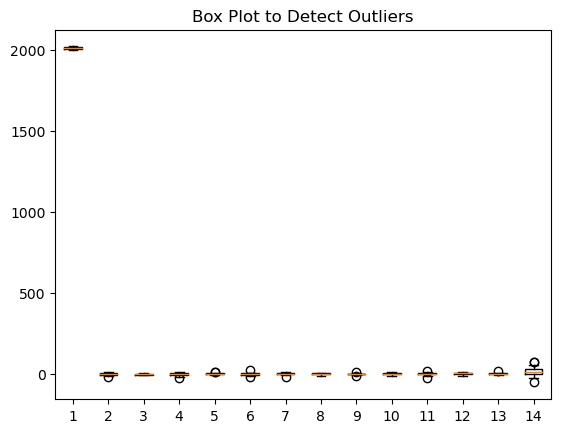

In [10]:
import pandas as pd
import numpy as np

# Load your dataset here
df = pd.read_csv('niftydata20yrs.csv')

# Define the outlier_extractor function
def outlier_extractor(data):
    numeric_data = data.select_dtypes(include=np.number)
    Q1, Q3 = numeric_data.quantile(0.25), numeric_data.quantile(0.75)
    IQR = Q3 - Q1
    numeric_data[:] = np.where((numeric_data > Q3 + 1.5 * IQR) | (numeric_data < Q1 - 1.5 * IQR), np.nan, numeric_data)
    numeric_data.apply(lambda series: series.dropna().to_csv(series.name + ".csv"))

# Call the outlier_extractor function with your dataset
outlier_extractor(df)

import matplotlib.pyplot as plt

# Example: Box plot to detect outliers
plt.boxplot(df)
plt.title("Box Plot to Detect Outliers")
plt.show()



In [11]:
import numpy as np
 
df = pd.read_csv('niftydata20yrs.csv')

 
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
threshold = 1.5 * iqr
outliers = np.where((data < q1 - threshold) | (data > q3 + threshold))
 
print("Outliers of array ",data,"is : \n", data[outliers])


NameError: name 'data' is not defined

In [12]:
import numpy as np
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv('niftydata20yrs.csv')

# Calculate quartiles and IQR
q1 = np.percentile(df, 25)
q3 = np.percentile(df, 75)
iqr = q3 - q1

# Calculate threshold for outliers
threshold = 1.5 * iqr

# Find outliers
outliers = np.where((df < q1 - threshold) | (df > q3 + threshold))

print("Outliers of DataFrame 'df' are:\n", df.iloc[outliers])


Outliers of DataFrame 'df' are:
     Year  Year  Annual  Year  Year  Annual  Year    May  Year  Annual  ...  \
0   2000  2000  -14.65  2000  2000  -14.65  2000  -1.86  2000  -14.65  ...   
1   2001  2001  -16.18  2001  2001  -16.18  2001   3.79  2001  -16.18  ...   
1   2001  2001  -16.18  2001  2001  -16.18  2001   3.79  2001  -16.18  ...   
2   2002  2002    3.25  2002  2002    3.25  2002  -5.14  2002    3.25  ...   
3   2003  2003   71.90  2003  2003   71.90  2003   7.79  2003   71.90  ...   
3   2003  2003   71.90  2003  2003   71.90  2003   7.79  2003   71.90  ...   
4   2004  2004   10.68  2004  2004   10.68  2004 -17.40  2004   10.68  ...   
4   2004  2004   10.68  2004  2004   10.68  2004 -17.40  2004   10.68  ...   
5   2005  2005   36.34  2005  2005   36.34  2005   9.73  2005   36.34  ...   
5   2005  2005   36.34  2005  2005   36.34  2005   9.73  2005   36.34  ...   
6   2006  2006   39.83  2006  2006   39.83  2006 -13.68  2006   39.83  ...   
6   2006  2006   39.83  2006  2

In [13]:
import numpy as np
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv('niftydata20yrs.csv')

# Calculate quartiles and IQR
q1 = np.percentile(df, 25)
q3 = np.percentile(df, 75)
iqr = q3 - q1

# Calculate threshold for outliers
threshold = 1.5 * iqr

# Find outliers
outliers = np.where((df < q1 - threshold) | (df > q3 + threshold))

# Extract unique outlier values
unique_outliers = np.unique(df.values[outliers])

print("Unique outliers in DataFrame 'df' are:\n", unique_outliers)


Unique outliers in DataFrame 'df' are:
 [ -51.79  -26.41  -24.62  -23.25  -17.4   -17.03  -16.31  -16.18   24.12
   27.7    28.07   28.65   31.39   36.34   39.83   54.77   71.9    75.76
 2000.   2001.   2002.   2003.   2004.   2005.   2006.   2007.   2008.
 2009.   2010.   2011.   2012.   2013.   2014.   2015.   2016.   2017.
 2018.   2019.   2020.   2021.   2022.   2023.  ]


In [14]:
import numpy as np
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv('niftydata20yrs.csv')

# Calculate quartiles and IQR
q1 = np.percentile(df, 25)
q3 = np.percentile(df, 75)
iqr = q3 - q1

# Calculate the lower and upper fences for outliers
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

# Find outliers
outliers = np.where((df < lower_fence) | (df > upper_fence))

print("Outliers in DataFrame 'df' are:\n", df[outliers])


InvalidIndexError: (array([ 0,  1,  1,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  8,
        8,  8,  9,  9,  9, 10, 11, 11, 12, 12, 13, 14, 14, 15, 16, 17, 17,
       18, 19, 20, 20, 21, 21, 22, 23], dtype=int64), array([ 0,  0, 13,  0,  0, 13,  0,  5,  0, 13,  0, 13,  0, 13,  0,  1,  6,
       10, 13,  0,  5, 13,  0,  0, 13,  0, 13,  0,  0, 13,  0,  0,  0, 13,
        0,  0,  0,  3,  0, 13,  0,  0], dtype=int64))

In [15]:
import numpy as np
import pandas as pd

# Load the dataset from CSV file
df = pd.read_csv('niftydata20yrs.csv')

# Calculate quartiles and IQR
q1 = np.percentile(df, 25)
q3 = np.percentile(df, 75)
iqr = q3 - q1

# Calculate the lower and upper fences for outliers
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

# Find outliers
outliers_idx = np.where((df < lower_fence) | (df > upper_fence))
outliers = df.values[outliers_idx]

print("Outliers in DataFrame 'df' are:\n", outliers)


Outliers in DataFrame 'df' are:
 [2000.   2001.    -16.18 2002.   2003.     71.9  2004.    -17.4  2005.
   36.34 2006.     39.83 2007.     54.77 2008.    -16.31  -17.03  -26.41
  -51.79 2009.     28.07   75.76 2010.   2011.    -24.62 2012.     27.7
 2013.   2014.     31.39 2015.   2016.   2017.     28.65 2018.   2019.
 2020.    -23.25 2021.     24.12 2022.   2023.  ]
